Imports and Packages

In [36]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

 Example 1 - A simple cost function

 $$f(x) = x^2 + x + 1$$ 

In [37]:
def f(x):
    return x**2 + x + 1 

In [38]:
# Generating Data
x_1 = np.linspace(start=-3, stop=3, num=500)


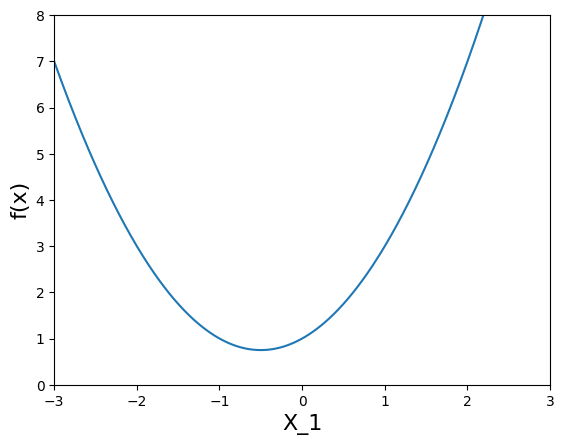

In [39]:
# Plot generated data - feed generated data through simple cost function and plot against x_1
plt.xlim([-3, 3])
plt.ylim([0,8])
plt.xlabel('X_1', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

Slope & Derivatives

In [40]:
def df(x):
    return 2*x + 1

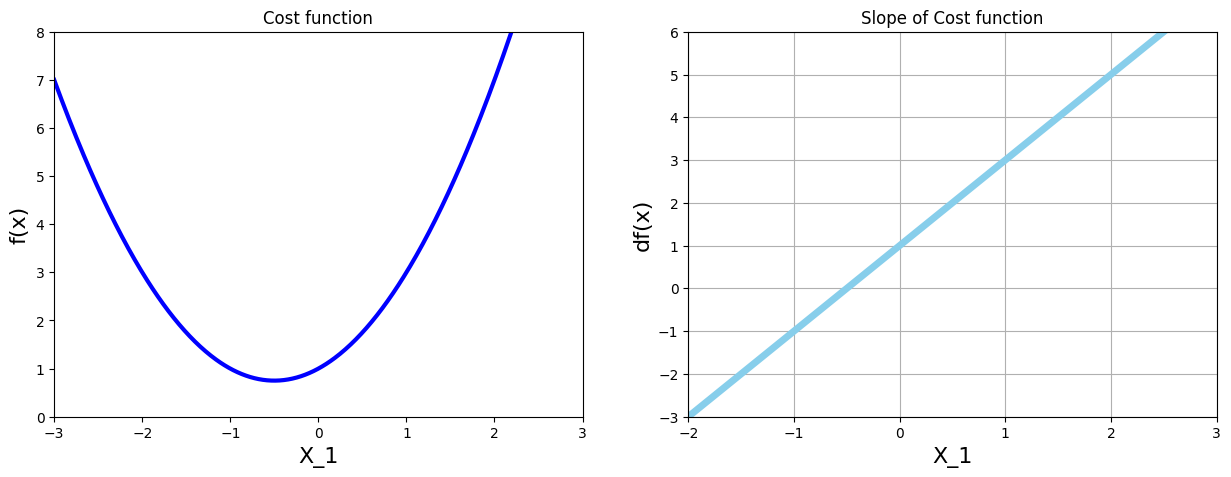

In [46]:
# Plot simple cost function and derivative of simple cost function side by side 

plt.figure(figsize=[15,5])

#Plot 1 - Simple Cost function
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim(0,8)
plt.title('Cost function')
plt.xlabel('X_1', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#Plot 2 - Derivative 
plt.subplot(1, 2, 2)

plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.title('Slope of Cost function')
plt.xlabel('X_1', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()



Gradient Descent

In [42]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.000000001

x_list = [new_x]
slope_list = [df(new_x)]


for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision:
        print("loop ran this many times:", n)
        break

print("local minimum occurs at: ", new_x)
print("slope/df(x) value at this point is: ", df(new_x))
print("f(x) value or cost at this point is:", f(new_x))

loop ran this many times: 92
local minimum occurs at:  -0.49999999660032945
slope/df(x) value at this point is:  6.7993410901578955e-09
f(x) value or cost at this point is: 0.75


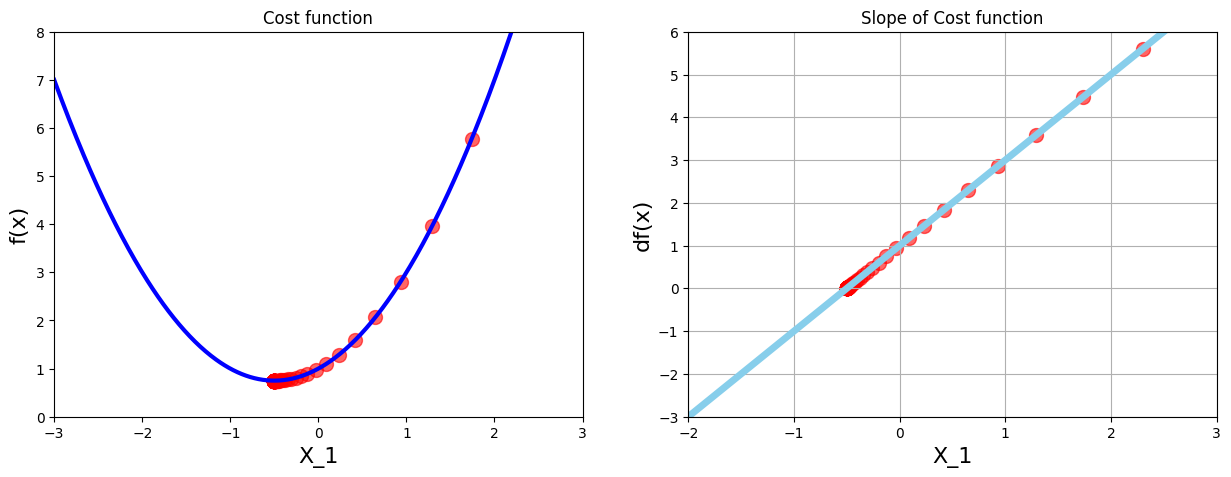

In [51]:
# Superimpose gradient descent calculations on simple cost function and derivative of simple cost function plot

plt.figure(figsize=[15,5])

#Plot 1 - Simple Cost function
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim(0,8)
plt.title('Cost function')
plt.xlabel('X_1', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

new_x_values = np.array(x_list)

plt.scatter(x_list, f(new_x_values), color='red', s=100, alpha=0.6)

#Plot 2 - Derivative 
plt.subplot(1, 2, 2)

plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.title('Slope of Cost function')
plt.xlabel('X_1', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.scatter(x_list, df(new_x_values), color='red', s=100, alpha=0.6)

plt.show()

